## Decision Tree Algorithm

### 1. Load Libraries

In [2]:
! pip install graphviz

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### 2. Load Data

In [2]:
# Load data

df = pd.read_csv('../3.Regression/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocessing of Data

In [7]:
# Preprocessing of data
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return x

In [8]:
df['level'] = df['quality'].apply(lambda x: create_level(x))

In [9]:
print(df.quality.describe())
print(df.level.value_counts())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
low       744
medium    638
high      217
Name: level, dtype: int64


In [10]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['level'])
#le_encoded = le.transform(le)
print((le.classes_))
print(le_encoded)

['high' 'low' 'medium']
[1 1 1 ... 2 1 2]


### 4. Visualize Data

In [ ]:
# Explore data visually
# Build Correlation Matrix to
correlation = df.iloc[:,:10].corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

### 5. Split Data in Training & Testing samples

In [11]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10],le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


### 6. Build Decision Tree Model

In [12]:
# Build Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

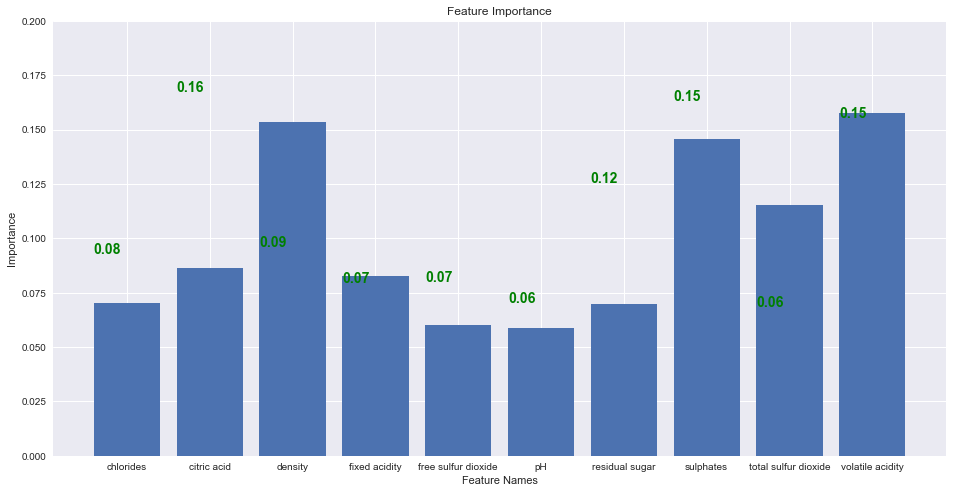

In [13]:
variableImp = pd.DataFrame({"Feature":df.columns[:10],"Importance":clf.feature_importances_})

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.bar(x = variableImp.Feature, height = variableImp.Importance)
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance')
ax.set_ylim(top = 0.2)
for i, v in enumerate(variableImp.Importance):
    ax.text(i-0.4, v + 0.01, s = np.round(v,2), color='green', fontweight='bold',fontsize=14)

In [14]:
# Model diagnostic
print(score)
print(y_predicted)

0.65625
[2 2 1 1 2 0 1 1 1 1 2 2 2 0 1 2 1 2 1 2 1 2 0 1 1 2 2 2 1 1 1 2 2 1 2 0 2
 0 2 2 1 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 0 2 1 2 2 1 1 2 2 1 1 0 2 0 1 1 2 2
 2 2 0 2 2 2 2 2 1 1 0 2 0 2 1 2 0 2 2 1 1 2 1 1 1 0 0 1 2 1 0 1 1 2 1 1 1
 1 2 0 0 1 2 2 1 2 0 2 2 2 0 1 2 1 2 1 1 2 2 1 2 1 1 2 1 2 0 1 1 2 1 1 0 1
 1 2 1 1 2 0 1 1 1 1 1 1 1 1 0 1 2 2 2 2 1 1 2 1 0 2 0 2 1 2 2 0 2 1 0 2 2
 2 2 1 1 2 2 1 2 2 2 1 2 1 2 2 0 1 2 2 0 1 1 2 2 2 1 2 1 1 1 1 2 1 1 0 2 2
 2 1 1 1 0 2 2 0 1 1 1 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 0 1 1
 1 0 0 1 2 1 0 0 2 2 2 1 1 0 2 1 1 1 2 0 1 1 1 0 0 1 1 1 2 1 2 0 0 2 1 2 0
 1 1 0 2 2 1 1 1 2 2 2 2 1 1 2 2 0 1 1 1 2 1 1 1]


In [15]:
df.columns[0:10]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

Graphviz Windows external library:
https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software

In [ ]:

graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names = df.columns[0:10], class_names = ['0', '1', '2'] 
   , filled = True))

graph.format = 'png'
graph.render('dtree_render',view=True)

display(SVG(graph.pipe(format='svg')))

In [58]:
tree.export_graphviz(clf,out_file='tree.dot')  

### 7. Predict outcome using the Test Data

In [18]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [19]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 8. Confusion Matrix

In [20]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 27,   5,  13],
       [  4, 102,  38],
       [ 15,  35,  81]])

In [21]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 27   5  13]
 [  4 102  38]
 [ 15  35  81]]
Normalized confusion matrix
[[0.6  0.11 0.29]
 [0.03 0.71 0.26]
 [0.11 0.27 0.62]]


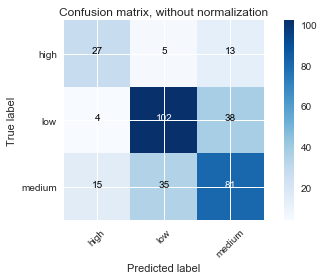

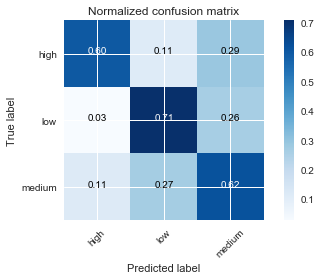

In [22]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Model 2.0 - using MinMax Scalar to preprocess data

In [23]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(df.iloc[:,:10])

In [24]:
X_minmax

array([[0.25, 0.4 , 0.  , ..., 0.57, 0.61, 0.14],
       [0.28, 0.52, 0.  , ..., 0.49, 0.36, 0.21],
       [0.28, 0.44, 0.04, ..., 0.51, 0.41, 0.19],
       ...,
       [0.15, 0.27, 0.13, ..., 0.42, 0.54, 0.25],
       [0.12, 0.36, 0.12, ..., 0.4 , 0.65, 0.23],
       [0.12, 0.13, 0.47, ..., 0.4 , 0.51, 0.2 ]])

In [25]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_minmax,le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


In [26]:
# Build Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [27]:
# Model diagnostic
print(score)
print(y_predicted)

0.659375
[2 2 1 1 2 0 1 1 1 1 2 2 2 0 1 2 1 2 1 2 1 2 0 1 1 2 1 2 1 1 1 2 2 1 2 0 2
 0 2 1 1 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 0 2 1 2 2 1 1 2 2 1 1 0 2 0 1 1 2 2
 2 2 0 2 2 2 2 2 1 1 0 2 0 2 1 2 0 2 2 1 1 2 1 1 1 0 0 1 2 1 0 1 1 2 1 1 1
 1 2 0 0 1 2 2 1 2 0 2 2 0 0 1 2 1 2 1 1 2 2 1 2 1 1 2 1 2 0 1 1 1 1 1 0 1
 1 2 1 1 2 0 1 1 1 1 1 1 1 1 0 1 2 0 2 2 1 1 2 1 0 2 0 2 2 2 2 2 2 1 0 2 2
 2 2 2 1 2 2 1 2 2 2 1 2 1 2 2 0 1 2 2 0 1 1 2 2 2 1 2 1 1 1 1 2 1 1 0 2 2
 0 1 1 1 0 2 2 0 1 1 1 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 0 1 1
 2 0 0 1 2 2 2 0 2 2 2 2 1 0 1 1 1 1 2 0 1 1 1 0 0 1 1 1 2 1 2 0 1 2 1 2 0
 1 1 0 2 2 1 2 1 2 1 2 1 1 1 2 1 0 1 1 1 2 1 1 1]


In [28]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [29]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

In [30]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 27,   5,  13],
       [  3, 104,  37],
       [ 16,  35,  80]])

In [31]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 27   5  13]
 [  3 104  37]
 [ 16  35  80]]
Normalized confusion matrix
[[0.6  0.11 0.29]
 [0.02 0.72 0.26]
 [0.12 0.27 0.61]]


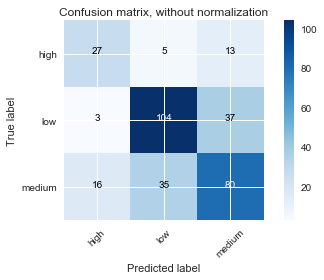

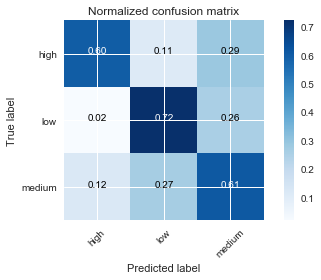

In [32]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Model 3.0 - using Standard Scalar to preprocess data

In [33]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_stdscalar = stdscalar.fit_transform(df.iloc[:,:10])
X_stdscalar

array([[-0.53,  0.96, -1.39, ...,  0.56,  1.29, -0.58],
       [-0.3 ,  1.97, -1.39, ...,  0.03, -0.72,  0.13],
       [-0.3 ,  1.3 , -1.19, ...,  0.13, -0.33, -0.05],
       ...,
       [-1.16, -0.1 , -0.72, ..., -0.53,  0.71,  0.54],
       [-1.39,  0.65, -0.78, ..., -0.68,  1.68,  0.31],
       [-1.33, -1.22,  1.02, ..., -0.67,  0.51,  0.01]])

In [34]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_stdscalar,le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


In [35]:
# Build Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [36]:
# Model diagnostic
print(score)
print(y_predicted)

0.65
[2 2 1 1 2 0 1 1 1 1 2 2 2 0 1 2 1 2 1 2 1 2 0 1 1 2 2 2 1 1 1 2 2 1 2 0 2
 0 2 2 1 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 0 2 1 2 2 1 1 2 2 1 1 0 2 0 1 1 2 2
 2 2 0 2 2 2 2 2 1 1 0 2 0 2 1 2 0 2 2 1 1 2 1 1 1 2 0 1 2 1 0 1 1 2 1 1 1
 1 2 0 0 1 2 2 1 2 0 2 2 2 0 1 2 1 2 1 1 2 2 1 2 1 1 2 1 2 0 1 1 2 1 1 0 1
 1 2 1 1 2 0 0 1 2 1 1 1 1 1 0 1 2 2 2 2 1 1 2 1 0 2 0 2 1 2 2 0 2 1 0 2 2
 2 2 1 1 2 2 1 2 2 2 1 2 1 2 2 0 1 2 2 0 1 1 2 2 2 1 2 1 1 1 1 2 1 1 0 2 0
 0 1 1 1 0 2 2 0 1 1 1 2 1 2 2 1 1 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 0 1 1
 2 0 0 1 2 1 2 0 2 2 2 1 1 0 2 1 1 1 2 0 1 1 1 0 0 1 1 1 2 1 2 0 0 2 1 2 0
 1 1 0 2 2 1 2 1 2 1 2 2 1 1 2 2 0 1 1 1 2 1 1 1]


In [37]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [38]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

In [39]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)

In [40]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 27   5  13]
 [  3 101  40]
 [ 17  34  80]]
Normalized confusion matrix
[[0.6  0.11 0.29]
 [0.02 0.7  0.28]
 [0.13 0.26 0.61]]


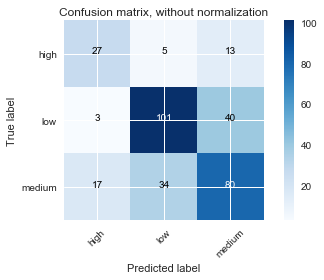

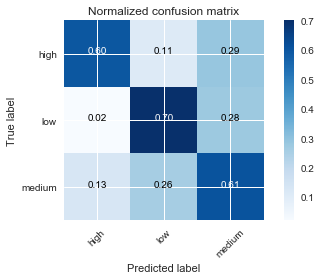

In [41]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()